In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
import json
f = open('/content/drive/MyDrive/lala.json')
data_product = json.load(f)

f = open('/content/drive/MyDrive/user_data.json')
user_json = json.load(f)

In [3]:
class user_data(object):
    def __init__(self, id='', gender='', ip_address='', money_purchase=''):
        self.id = id
        self.gender = gender
        self.ip_address = ip_address
        self.money_purchase = money_purchase
        self.product_ID = []

    def as_dict(self):
        return {'id': self.id, 'gender': self.gender, 'ip_address': self.ip_address, "money_purchase": self.money_purchase, "product_ID": self.product_ID}

lData = []

for temp in user_json:
    lData.append(user_data(temp['id'], temp['gender'], temp['ip_address'], temp['money_purchase']))

df = pd.DataFrame([x.as_dict() for x in lData])

In [4]:
df.head()

,id,gender,ip_address,money_purchase,product_ID
0,6590e95e8d295d3b8e11d7d5,Female,Carvalhal,$805.19,[]
1,6590e95e8d295d3b8e11d7d5,Male,Santo Isidro,$718.96,[]
2,3,Male,Troparëvo,$985.95,[]
3,4,Male,Staryy Cherek,$429.02,[]
4,5,Male,Huangshi,$411.80,[]


In [5]:
def makeFakeDataProductIDFunction(input_data):
    import random
    quantities = [5, 6, 7]
    pId = [ele for ele in range(1, 52)]
    return [random.choice(pId) for _ in range(random.choice(quantities))]

df['product_ID'] = df['product_ID'].apply(makeFakeDataProductIDFunction)

In [6]:
df.head

<bound method NDFrame.head of                            id  gender         ip_address money_purchase  \
0    6590e95e8d295d3b8e11d7d5  Female          Carvalhal        $805.19   
1    6590e95e8d295d3b8e11d7d5    Male       Santo Isidro        $718.96   
2                           3    Male          Troparëvo        $985.95   
3                           4    Male      Staryy Cherek        $429.02   
4                           5    Male           Huangshi        $411.80   
..                        ...     ...                ...            ...   
995                       996  Female           Sieniawa        $393.56   
996                       997  Female              Wanfa        $474.11   
997                       998  Female          Jangheung        $374.66   
998                       999  Female              Ochër        $385.25   
999                      1000  Female  Majdal Banī Fāḑil        $717.66   

                       product_ID  
0          [9, 7, 22, 30, 13, 23]

In [7]:
def fixedMoney(input_data):
    return int(input_data.replace("$", "").replace(".", ""))

df["money_purchase"] = df["money_purchase"].apply(fixedMoney)

In [8]:
df['gender'].value_counts().to_dict()

{'Female': 469,
 'Male': 427,
 'Bigender': 21,
 'Non-binary': 19,
 'Genderqueer': 18,
 'Polygender': 17,
 'Genderfluid': 17,
 'Agender': 12}

In [9]:
df['ip_address'].value_counts().to_dict()

{'San Antonio': 3,
 'El Paso': 3,
 'Oslo': 3,
 'Kuala Lumpur': 3,
 'Longquan': 3,
 'Stare Miasto': 2,
 'Čelopek': 2,
 'Playas': 2,
 'Bagong Pagasa': 2,
 'Liulin': 2,
 'San Pedro': 2,
 'Toulon': 2,
 'Paprotnia': 2,
 'Lyon': 2,
 'Mabini': 2,
 'Sacramento': 2,
 'Göteborg': 2,
 'Uppsala': 2,
 'Kista': 2,
 'Stockholm': 2,
 'Järfälla': 2,
 'Cluses': 2,
 'Dřiteň': 2,
 'União': 2,
 'Borås': 2,
 'Bicaj': 1,
 'Naha-shi': 1,
 'Uchimaru': 1,
 'Tovarnik': 1,
 'Rawa Satu': 1,
 'Prince Albert': 1,
 'San Salvador de Jujuy': 1,
 'Marovoay': 1,
 'Pyatigorskiy': 1,
 'Bayt Līd': 1,
 'Quixeramobim': 1,
 'Velventós': 1,
 'Angoulême': 1,
 'Debrecen': 1,
 'Baluk': 1,
 'Kaset Wisai': 1,
 'Guamo': 1,
 'Kuala Terengganu': 1,
 'Banjarejo': 1,
 'Menampukrajan': 1,
 'Goryachevodskiy': 1,
 'Tangtu': 1,
 'Tawau': 1,
 'Mobaye': 1,
 'Taizhou': 1,
 'Jabon': 1,
 'Karangtengah': 1,
 'Sam Khok': 1,
 'Abū Qalqal': 1,
 'Purorejo': 1,
 'Cikuda': 1,
 'Dabou': 1,
 'Pingya': 1,
 'Lafayette': 1,
 'Filiátes': 1,
 'Numata': 1,
 'Ou

In [10]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
ip_address1_hot = cat_encoder.fit_transform(df['ip_address'].to_numpy().reshape((-1, 1)))
ip_address1_hot

<1000x970 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [11]:
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(ip_address1_hot)

sparse_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
sparse_matrix.shape

(1000, 970)

In [13]:
df = df.drop('id', axis=1)

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Create a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class transformArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.reshape((-1, 1))

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

cat_attribs = ["ip_address", "gender"]


transform_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False)),
    # ('first_imputer', SimpleImputer(strategy='median'))
])

num_attribs = 'money_purchase'

imputer_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('TransformArray', transformArray()),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", imputer_pipeline),
        ("cat_pipeline", transform_pipeline),
    ])

data = old_full_pipeline.fit_transform(df)

In [16]:
data[0]

array([0.9512244, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [17]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=7)
decomposed_matrix = SVD.fit_transform(data)
decomposed_matrix.shape

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

correlation_matrix

array([[ 1.        ,  0.36336712,  0.5956759 , ...,  0.21971475,
         0.25119611,  0.98418033],
       [ 0.36336712,  1.        ,  0.92086246, ..., -0.43593908,
        -0.42046694,  0.26395003],
       [ 0.5956759 ,  0.92086246,  1.        , ..., -0.50546612,
        -0.48173784,  0.4706876 ],
       ...,
       [ 0.21971475, -0.43593908, -0.50546612, ...,  1.        ,
         0.99947537,  0.38907927],
       [ 0.25119611, -0.42046694, -0.48173784, ...,  0.99947537,
         1.        ,  0.41871116],
       [ 0.98418033,  0.26395003,  0.4706876 , ...,  0.38907927,
         0.41871116,  1.        ]])

In [18]:
request_ID = 1

recommend = [index for index, i in enumerate(correlation_matrix[request_ID]) if i > 0.7]

hash_= {}

for index, i in enumerate(correlation_matrix[request_ID]):
    hash_[i] = index

recomment_product = []

for element in list(hash_.keys())[:5]:
    arr = df.loc[hash_[element]].product_ID
    for ele in set(arr):
        recomment_product.append(ele)

print(recomment_product)

[7, 9, 13, 22, 23, 30, 2, 41, 11, 49, 18, 17, 39, 9, 46, 19, 21, 25, 28, 33, 38, 39, 18, 28, 2, 37, 39, 10, 14, 51]


In [22]:
class product(object):
    def __init__(self, id='', title='', description='', price='', discountPercentage='', rating='', brand='', category=''):
        self.id = id
        self.title = title
        self.description = description
        self.price = price
        self.discountPercentage = discountPercentage
        self.rating = rating
        self.brand = brand
        self.category = category

    def as_dict(self):
        return {'id': self.id, 'title': self.title, 'description': self.description,
                'price': self.price, 'discountPercentage': self.discountPercentage, 'rating': self.rating, 'brand': self.brand,
                'category': self.category
                }

lData = []

for temp in data_product['beverages']:
    lData.append(product(temp['id'], temp['title'], temp['description'], temp['price'],
                         temp['discountPercentage'], temp['rating'], temp['brand'], temp['category']))

df = pd.DataFrame([x.as_dict() for x in lData])

In [23]:
df.head()

,id,title,description,price,discountPercentage,rating,brand,category
0,1,Apple Juice,Apple Juice là một đồ uống tươi ngon và bổ dưỡ...,37000,0,4.6,Nature's Best,Fruit Juice
1,2,Grape Juice,"Refreshing grape juice, made from the finest g...",22000,0,4.7,Vineyard Delights,Fruit Juice
2,3,Orange Juice,"Freshly squeezed orange juice, packed with vit...",45000,10,4.8,Citrus Delights,Fruit Juice
3,4,Mango Juice,"Sweet and tangy mango juice, perfect for a tro...",30000,0,4.7,Tropical Paradise,Fruit Juice
4,5,Pineapple Juice,Tropical pineapple juice with a burst of tropi...,22000,0,4.7,Tropical Delights,Fruit Juice


In [24]:
defaultData = df

df = df.drop('title', axis=1)
df = df.drop('description', axis=1)

In [25]:
df['brand'].value_counts().to_dict()

{'Smoothie Sensations': 6,
 'Tea Delights': 4,
 'CoffeeCraft': 3,
 'Vineyard Delights': 2,
 'Tropical Delights': 2,
 'PepsiCo': 2,
 'The Coca-Cola Company': 2,
 'Fizzy Delights': 2,
 'FreshBlends': 2,
 'Vineyard Elegance': 1,
 'Zen Tea': 1,
 'Sweetea Delights': 1,
 'Tea Elegance': 1,
 'Château de Champagne': 1,
 'Golden Vineyards': 1,
 'Vineyard Select': 1,
 'Coca Cola Company': 1,
 'Dr Pepper Snapple Group': 1,
 "DuyThai's Company": 1,
 'Tea Haven': 1,
 "Nature's Best": 1,
 'Saigon Coffee Co.': 1,
 'Americano Elegance': 1,
 'Latte Delights': 1,
 'Espresso Delight': 1,
 'Café Elegance': 1,
 'Café Delights': 1,
 'Coffee Delights': 1,
 'Tropical Treats': 1,
 'Smoothie Delights': 1,
 'Sunshine Juicery': 1,
 'Fruit Paradise': 1,
 'Tropical Oasis': 1,
 'Tropical Paradise': 1,
 'Citrus Delights': 1,
 'VREDE': 1}

In [26]:
df.describe()

,id,price,discountPercentage,rating
count,52.000000,5.200000e+01,52.000000,52.000000
mean,26.500000,1.820192e+05,6.730769,4.665385
std,15.154757,5.586269e+05,10.976116,0.193912
min,1.000000,8.000000e+03,0.000000,4.000000
25%,13.750000,2.925000e+04,0.000000,4.600000
50%,26.500000,4.250000e+04,0.000000,4.700000
75%,39.250000,7.000000e+04,10.000000,4.800000
max,52.000000,3.800000e+06,50.000000,4.900000


In [27]:
df['price'] /= (10**3)

In [28]:
df['price'] = df['price'].astype(int)

In [29]:
df['price'].head()

0    37
1    22
2    45
3    30
4    22
Name: price, dtype: int64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='discountPercentage', ylabel='price'>,
        <Axes: xlabel='rating', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='discountPercentage'>,
        <Axes: xlabel='discountPercentage', ylabel='discountPercentage'>,
        <Axes: xlabel='rating', ylabel='discountPercentage'>],
       [<Axes: xlabel='price', ylabel='rating'>,
        <Axes: xlabel='discountPercentage', ylabel='rating'>,
        <Axes: xlabel='rating', ylabel='rating'>]], dtype=object)

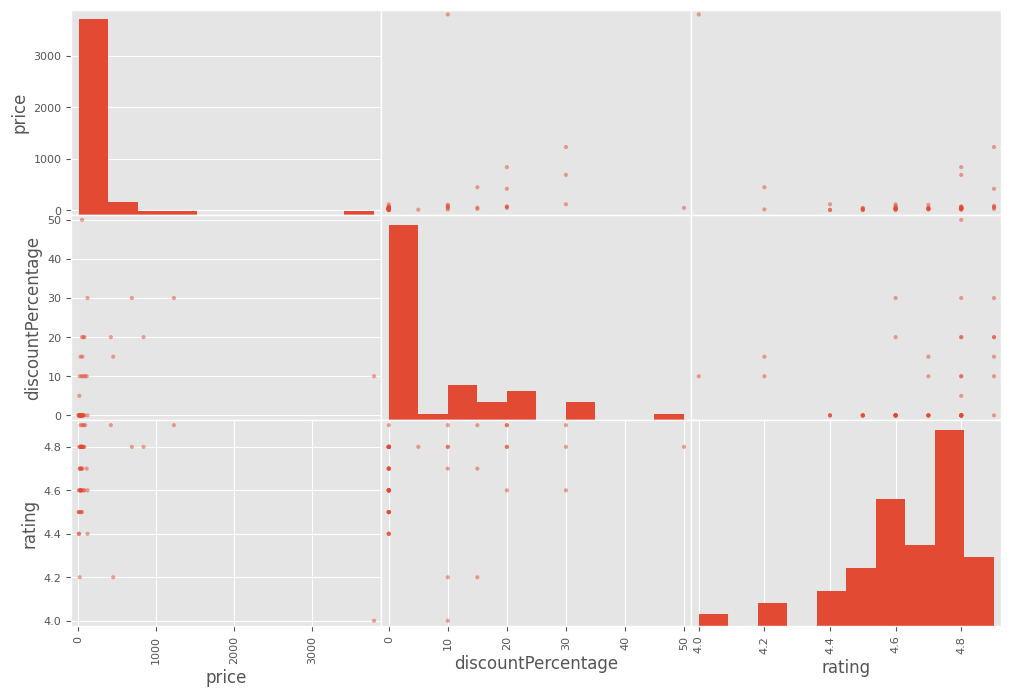

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'discountPercentage', 'rating', 'brand',
              'category']

scatter_matrix(df[attributes], figsize=(12, 8))

In [31]:
product_category = df[['brand']]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
product_category = ordinal_encoder.fit_transform(product_category)
product_category[:10]

array([[16.],
       [32.],
       [ 4.],
       [29.],
       [27.],
       [28.],
       [13.],
       [27.],
       [21.],
       [20.]])

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
product_category_1hot = cat_encoder.fit_transform(product_category)
product_category_1hot

<52x36 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>

In [33]:
product_category_1hot.toarray()[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

price_idx, brand_idx, cate_idx = 1, 4, 5

class BinsConvertPrice(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bins_price = np.array([0, 30, 50, 80, np.inf])
        X[:, price_idx] = np.digitize(X[:, price_idx], bins_price)
        return X


class ConvertStringToNumber(BaseEstimator, TransformerMixin):
    def __intit__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        brandOneHot = OrdinalEncoder()
        X[['brand']] = brandOneHot.fit_transform(X[['brand']])

        cateOneHot = OrdinalEncoder()
        X[['category']] = cateOneHot.fit_transform(X[['category']])
        return X


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer



num_pipeline = Pipeline([
    ('Convert', ConvertStringToNumber()),
    ('first_imputer', SimpleImputer(strategy='median')),
    ('ConvertColumn', BinsConvertPrice())
])

data = num_pipeline.fit_transform(df)

In [36]:
data[:5]

array([[ 1. ,  2. ,  0. ,  4.6, 16. ,  1. ],
       [ 2. ,  1. ,  0. ,  4.7, 32. ,  1. ],
       [ 3. ,  2. , 10. ,  4.8,  4. ,  1. ],
       [ 4. ,  2. ,  0. ,  4.7, 29. ,  1. ],
       [ 5. ,  1. ,  0. ,  4.7, 27. ,  1. ]])

In [37]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=6)
decomposed_matrix = SVD.fit_transform(data)
decomposed_matrix.shape

(52, 6)

In [38]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(52, 52)

In [39]:
correlation_matrix

array([[1.        , 0.98372266, 0.20986224, ..., 0.46046965, 0.19862403,
        0.47393296],
       [0.98372266, 1.        , 0.13803232, ..., 0.46674487, 0.18825774,
        0.48036129],
       [0.20986224, 0.13803232, 1.        , ..., 0.31243558, 0.30530666,
        0.43152987],
       ...,
       [0.46046965, 0.46674487, 0.31243558, ..., 1.        , 0.95344573,
        0.98753819],
       [0.19862403, 0.18825774, 0.30530666, ..., 0.95344573, 1.        ,
        0.93384421],
       [0.47393296, 0.48036129, 0.43152987, ..., 0.98753819, 0.93384421,
        1.        ]])

In [40]:
correlation_matrix[2]

array([0.20986224, 0.13803232, 1.        , 0.17157202, 0.17889741,
       0.19225538, 0.30052669, 0.21169756, 0.25460699, 0.80753262,
       0.30199271, 0.80209693, 0.30868912, 0.31303179, 0.59830645,
       0.33221603, 0.65310214, 0.36315449, 0.35951608, 0.69883539,
       0.29803151, 0.78935484, 0.56438177, 0.29853205, 0.28579355,
       0.29689816, 0.30156846, 0.29163205, 0.48244169, 0.32004432,
       0.3128864 , 0.50308447, 0.32647891, 0.31989976, 0.82484774,
       0.32724383, 0.32062282, 0.58347743, 0.72337153, 0.57047648,
       0.69236323, 0.5128384 , 0.33258164, 0.45988622, 0.39270043,
       0.31590851, 0.32350379, 0.32288603, 0.32149325, 0.31243558,
       0.30530666, 0.43152987])

In [41]:
product_ID = 1
recommend = [index for index, i in enumerate(correlation_matrix[product_ID]) if i > 0.8]
recommend

[0, 1, 3, 4, 5, 6, 7, 8, 10, 12, 13]

In [42]:
defaultData.iloc[recommend]

,id,title,description,price,discountPercentage,rating,brand,category
0,1,Apple Juice,Apple Juice là một đồ uống tươi ngon và bổ dưỡ...,37000,0,4.6,Nature's Best,Fruit Juice
1,2,Grape Juice,"Refreshing grape juice, made from the finest g...",22000,0,4.7,Vineyard Delights,Fruit Juice
3,4,Mango Juice,"Sweet and tangy mango juice, perfect for a tro...",30000,0,4.7,Tropical Paradise,Fruit Juice
4,5,Pineapple Juice,Tropical pineapple juice with a burst of tropi...,22000,0,4.7,Tropical Delights,Fruit Juice
5,6,Mango Passion Fruit Juice,A delightful blend of mango and passion fruit ...,40000,0,4.8,Tropical Oasis,Fruit Juice
6,7,Watermelon Juice,"Juicy and refreshing watermelon juice, perfect...",27000,0,4.6,Fruit Paradise,Fruit Juice
7,8,Mango Tango Juice,"Exotic mango juice with a tropical twist, a bu...",36000,0,4.8,Tropical Delights,Fruit Juice
8,9,Citrus Burst,"Zesty citrus juice blend, a burst of tangy and...",47000,0,4.8,Sunshine Juicery,Fruit Juice
10,11,Tropical Sunrise Smoothie,Start your day with this tropical smoothie tha...,45000,0,4.7,Smoothie Sensations,Fruit Smoothie
12,13,Green Reviver Smoothie,"A nutritious green smoothie with spinach, kale...",30000,0,4.6,Smoothie Sensations,Fruit Smoothie
